# IMPORT LIBRARY

In [13]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import shutil
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from PIL import Image

# DATASET

## Preparing the dataset


In [62]:
# # Load the metadata CSV file
# metadata_file_path = 'dataset/ISIC2020/train/ISIC_2020_Training_GroundTruth_v2.csv' 
# metadata = pd.read_csv(metadata_file_path)

# # Define the path to the images
# images_folder_path = 'dataset/ISIC2020/train/train_images'

# # Add file extension to image names (if not already present)
# metadata['image_name'] = metadata['image_name'].apply(lambda x: f"{x}.jpg")

# # Map benign and malignant labels to '0' and '1' as strings
# metadata['label'] = metadata['benign_malignant'].map({'benign': '0', 'malignant': '1'})

# # Split metadata into training and validation sets
# train_metadata, val_metadata = train_test_split(metadata, test_size=0.2, random_state=42)

# # Define ImageDataGenerator for training and validation sets
# train_datagen = ImageDataGenerator(
#     rescale=1./255,       # Rescale images to [0, 1]
#     # rotation_range=20,    # Randomly rotate images
#     # width_shift_range=0.2, # Randomly translate images horizontally
#     # height_shift_range=0.2, # Randomly translate images vertically
#     # shear_range=0.2,      # Randomly shear images
#     # zoom_range=0.2,       # Randomly zoom images
#     # horizontal_flip=True, # Randomly flip images horizontally
#     # fill_mode='nearest'   # Fill pixels after transformations
# )

# val_datagen = ImageDataGenerator(rescale=1./255)
# batch_size = 32

# # Create generators
# train_generator = train_datagen.flow_from_dataframe(
#     dataframe=train_metadata,
#     directory=images_folder_path,
#     x_col='image_name',
#     y_col='benign_malignant',
#     target_size=(224, 224),
#     batch_size=batch_size,
#     class_mode='binary',  # Since it's binary classification
#     #subset='training'
# )

# val_generator = val_datagen.flow_from_dataframe(
#     dataframe=val_metadata,
#     directory=images_folder_path,
#     x_col='image_name',
#     y_col='benign_malignant',
#     target_size=(224, 224),
#     batch_size=batch_size,
#     class_mode='binary',  # Since it's binary classification
#     #subset='validation'
# )


Found 26499 validated image filenames belonging to 2 classes.
Found 6626 validated image filenames belonging to 2 classes.


/opt/anaconda3/envs/cvproj/lib/python3.12/site-packages/keras/src/legacy/preprocessing/image.py:920: UserWarning: Found 1 invalid image filename(s) in x_col="image_name". These filename(s) will be ignored.
  warnings.warn(


In [52]:
# from tensorflow.keras.preprocessing.image import load_img, img_to_array
# def custom_generator(metadata, image_datagen, batch_size, images_folder_path, target_size):
#     num_samples = len(metadata)
#     indices = list(range(num_samples))
#     batch_size = min(batch_size, num_samples)
    
#     while True:
#         batch_indices = np.random.choice(indices, batch_size, replace=False)
#         batch_metadata = metadata.iloc[batch_indices]
        
#         batch_image_names = batch_metadata['image_name'].tolist()
#         batch_labels = batch_metadata['label'].values
        
#         batch_images = []
#         for image_name in batch_image_names:
#             image_path = os.path.join(images_folder_path, image_name)
#             img = load_img(image_path, target_size=target_size)
#             img_array = img_to_array(img)
#             img_array = image_datagen.standardize(img_array)  # Optional: Apply other preprocessing steps
#             batch_images.append(img_array)
        
#         batch_images = np.array(batch_images)
#         yield batch_images, batch_labels
# # Specify target size and batch size
# target_size = (224, 224)
# batch_size = 32

# # Training generator
# train_generator = custom_generator(
#     metadata=train_metadata,
#     image_datagen=train_datagen,
#     batch_size=batch_size,
#     images_folder_path=images_folder_path,
#     target_size=target_size
# )

# # Validation generator
# val_generator = custom_generator(
#     metadata=val_metadata,
#     image_datagen=val_datagen,
#     batch_size=batch_size,
#     images_folder_path=images_folder_path,
#     target_size=target_size
# )


## Display Basic Statistic

Class Distribution in Training Set:
benign_malignant
benign       26035
malignant      465
Name: count, dtype: int64

Class Distribution in Validation Set:
benign_malignant
benign       6507
malignant     119
Name: count, dtype: int64

Age Statistics in Training Set:
count    26444.000000
mean        48.833951
std         14.381341
min         10.000000
25%         40.000000
50%         50.000000
75%         60.000000
max         90.000000
Name: age_approx, dtype: float64

Sample Training Images:


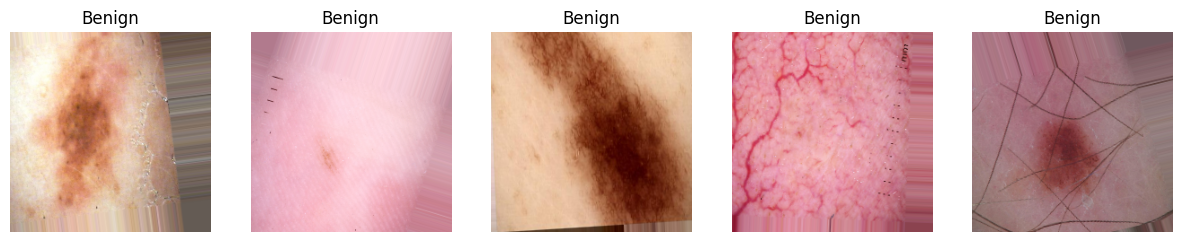

In [3]:
print("Class Distribution in Training Set:")
print(train_metadata['benign_malignant'].value_counts())

print("\nClass Distribution in Validation Set:")
print(val_metadata['benign_malignant'].value_counts())

print("\nAge Statistics in Training Set:")
print(train_metadata['age_approx'].describe())

# Display sample images with labels
def show_sample_images(generator, num_samples=5):
    images, labels = next(generator)
    plt.figure(figsize=(15, 5))
    for i in range(num_samples):
        plt.subplot(1, num_samples, i + 1)
        plt.imshow(images[i])
        plt.title('Malignant' if labels[i] == '1' else 'Benign')
        plt.axis('off')
    plt.show()

print("\nSample Training Images:")
show_sample_images(train_generator)

# MODEL


## FIRST IMPLEMENTATION

In [1]:
# from tensorflow.keras.layers import Input, DepthwiseConv2D, Conv2D, BatchNormalization, ReLU, AvgPool2D, Flatten, Dense, Concatenate
# from tensorflow.keras.models import Model

# # Function to create MobileNet block
# def mobilnet_block(x, filters, strides):
#     x = DepthwiseConv2D(kernel_size=3, strides=strides, padding='same')(x)
#     x = BatchNormalization()(x)
#     x = ReLU()(x)
    
#     x = Conv2D(filters=filters, kernel_size=1, strides=1)(x)
#     x = BatchNormalization()(x)
#     x = ReLU()(x)
    
#     return x

# # Input layers
# input_image = Input(shape=(224, 224, 3), name='input_image')
# # input_age = Input(shape=(1,), name='input_age')
# # input_position = Input(shape=(1,), name='input_position')

# # Stem of the model
# x = Conv2D(filters=32, kernel_size=3, strides=2, padding='same')(input_image)
# x = BatchNormalization()(x)
# x = ReLU()(x)

# # Main part of the model
# x = mobilnet_block(x, filters=64, strides=1)
# x = mobilnet_block(x, filters=128, strides=2)
# x = mobilnet_block(x, filters=128, strides=1)
# x = mobilnet_block(x, filters=256, strides=2)
# x = mobilnet_block(x, filters=256, strides=1)
# x = mobilnet_block(x, filters=512, strides=2)
# for _ in range(5):
#      x = mobilnet_block(x, filters=512, strides=1)
# x = mobilnet_block(x, filters=1024, strides=2)
# x = mobilnet_block(x, filters=1024, strides=1)
# x = AvgPool2D(pool_size=7, strides=1, data_format='channels_last')(x)
# x = Flatten()(x)

# # Concatenate with age and position inputs
# # x = Concatenate()([x, input_age, input_position])

# # Fully connected layers
# x = Dense(units=512, activation='relu')(x)
# output = Dense(units=1, activation='sigmoid')(x)  # Sigmoid for binary classification

# # Create the model
# # model = Model(inputs=[input_image, input_age, input_position], outputs=output)
# model = Model(inputs=[input_image], outputs=output)

# # Compile the model
# model.compile(optimizer='adam',
#               loss='binary_crossentropy',
#               metrics=['accuracy'])

# # Print model summary
# #model.summary()

In [2]:
# from tensorflow.keras.callbacks import EarlyStopping
# early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# history = model.fit(
#     train_generator,
#     steps_per_epoch=train_generator.samples // batch_size,
#     epochs=100,  # Adjust number of epochs as needed
#     validation_data=val_generator,
#     validation_steps=val_generator.samples // batch_size,
#     callbacks=[early_stopping]  # Include EarlyStopping callback
# )

## SECOND IMPLEMENTATION

In [14]:
# Load metadata
metadata = pd.read_csv('dataset/ISIC2020/train/ISIC_2020_Training_GroundTruth_v2.csv')

# Define image size and path
IMG_SIZE = 224
IMG_PATH = 'dataset/ISIC2020/train/train_images'

def load_and_preprocess_image(img_path):
    try:
        img = Image.open(img_path).resize((IMG_SIZE, IMG_SIZE))
        img = np.array(img) / 255.0  # normalize to [0, 1]
        return img
    except FileNotFoundError:
        return None  # Return None if the file is not found

# Ensure correct filenames
def ensure_file_extension(filename, extension=".jpg"):
    if not filename.lower().endswith(extension):
        return filename + extension
    return filename

# Check if files exist and load valid images
valid_metadata = []
valid_images = []

for _, row in metadata.iterrows():
    image_path = os.path.join(IMG_PATH, ensure_file_extension(row['image_name']))
    image = load_and_preprocess_image(image_path)
    if image is not None:
        valid_metadata.append(row)
        valid_images.append(image)

# Convert valid metadata and images to suitable formats
valid_metadata = pd.DataFrame(valid_metadata)
X_images = np.array(valid_images)

# Extract metadata features and target labels
X_metadata = valid_metadata[['age', 'gender', 'position']].values
y = valid_metadata['label'].values

# Split into training, validation, and test sets
X_train_img, X_temp_img, X_train_meta, X_temp_meta, y_train, y_temp = train_test_split(X_images, X_metadata, y, test_size=0.3, random_state=42)
X_val_img, X_test_img, X_val_meta, X_test_meta, y_val, y_test = train_test_split(X_temp_img, X_temp_meta, y_temp, test_size=0.5, random_state=42)

KeyboardInterrupt: 

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, DepthwiseConv2D, BatchNormalization, Activation, Add, GlobalAveragePooling2D, Reshape, Dense, Input, concatenate, Dropout
from tensorflow.keras.models import Model

def depthwise_separable_conv(x, filters, kernel_size, strides):
    x = DepthwiseConv2D(kernel_size=kernel_size, strides=strides, padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Conv2D(filters, kernel_size=(1, 1), strides=(1, 1), padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    return x

def squeeze_and_excite(x, ratio=4):
    filters = x.shape[-1]
    se = GlobalAveragePooling2D()(x)
    se = Reshape((1, 1, filters))(se)
    se = Dense(filters // ratio, activation='relu', kernel_initializer='he_normal', use_bias=False)(se)
    se = Dense(filters, activation='sigmoid', kernel_initializer='he_normal', use_bias=False)(se)
    return x * se

def bottleneck(x, filters, kernel_size, strides, expansion_factor, se_ratio=0.25):
    input_filters = x.shape[-1]
    expanded_filters = input_filters * expansion_factor
    
    # Expansion phase
    if expansion_factor != 1:
        x = Conv2D(expanded_filters, kernel_size=(1, 1), padding='same')(x)
        x = BatchNormalization()(x)
        x = Activation('relu')(x)
    
    # Depthwise Convolution
    x = DepthwiseConv2D(kernel_size=kernel_size, strides=strides, padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    
    # Squeeze-and-Excitation
    if se_ratio:
        x = squeeze_and_excite(x, ratio=se_ratio)
    
    # Projection phase
    x = Conv2D(filters, kernel_size=(1, 1), padding='same')(x)
    x = BatchNormalization()(x)
    
    if strides == 1 and input_filters == filters:
        x = Add()([x, input_tensor])
    
    return x

def small_mobilenetv3(input_shape=(224, 224, 3), num_classes=1):
    input_tensor = Input(shape=input_shape)
    
    x = Conv2D(16, kernel_size=(3, 3), strides=(2, 2), padding='same')(input_tensor)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    
    x = bottleneck(x, filters=16, kernel_size=(3, 3), strides=2, expansion_factor=1, se_ratio=0.25)
    x = bottleneck(x, filters=24, kernel_size=(3, 3), strides=2, expansion_factor=4, se_ratio=0)
    x = bottleneck(x, filters=24, kernel_size=(3, 3), strides=1, expansion_factor=3, se_ratio=0)
    x = bottleneck(x, filters=40, kernel_size=(5, 5), strides=2, expansion_factor=3, se_ratio=0.25)
    x = bottleneck(x, filters=40, kernel_size=(5, 5), strides=1, expansion_factor=3, se_ratio=0.25)
    x = bottleneck(x, filters=80, kernel_size=(3, 3), strides=2, expansion_factor=6, se_ratio=0)
    x = bottleneck(x, filters=80, kernel_size=(3, 3), strides=1, expansion_factor=2.5, se_ratio=0)
    
    x = Conv2D(576, kernel_size=(1, 1), padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    
    x = GlobalAveragePooling2D()(x)
    x = Reshape((1, 1, 576))(x)
    x = Dropout(0.2)(x)
    x = Conv2D(1280, kernel_size=(1, 1), padding='same')(x)
    x = Activation('relu')(x)
    x = Conv2D(num_classes, kernel_size=(1, 1), padding='same')(x)
    x = Activation('sigmoid')(x)
    x = Reshape((num_classes,))(x)
    
    return Model(inputs=input_tensor, outputs=x)

In [ ]:
# Metadata model
metadata_input = Input(shape=(3,))
m = Dense(64, activation='relu')(metadata_input)
m = Dense(32, activation='relu')(m)

# Image model
image_model = small_mobilenetv3()

# Combine models
combined = concatenate([image_model.output, m])
z = Dense(128, activation='relu')(combined)
z = Dropout(0.5)(z)
z = Dense(1, activation='sigmoid')(z)

# Create final model
model = Model(inputs=[image_model.input, metadata_input], outputs=z)
keras.utils.plot_model(model, "my_first_model.png")

# test

In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()

# Train the model
history = model.fit(
    [X_train_img, X_train_meta],
    y_train,
    validation_data=([X_val_img, X_val_meta], y_val),
    epochs=20,
    batch_size=32
)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate([X_test_img, X_test_meta], y_test)
print(f"Test Accuracy: {test_accuracy}")

# Save the model
model.save('small_mobilenetv3_skin_mole_classification_model.h5')

In [ ]:
import numpy as np
import keras
from keras import layers
from keras import ops
num_tags = 12  # Number of unique issue tags
num_words = 10000  # Size of vocabulary obtained when preprocessing text data
num_departments = 4  # Number of departments for predictions

title_input = keras.Input(
    shape=(None,), name="title"
)  # Variable-length sequence of ints
body_input = keras.Input(shape=(None,), name="body")  # Variable-length sequence of ints
tags_input = keras.Input(
    shape=(num_tags,), name="tags"
)  # Binary vectors of size `num_tags`

# Embed each word in the title into a 64-dimensional vector
title_features = layers.Embedding(num_words, 64)(title_input)
# Embed each word in the text into a 64-dimensional vector
body_features = layers.Embedding(num_words, 64)(body_input)

# Reduce sequence of embedded words in the title into a single 128-dimensional vector
title_features = layers.LSTM(128)(title_features)
# Reduce sequence of embedded words in the body into a single 32-dimensional vector
body_features = layers.LSTM(32)(body_features)

# Merge all available features into a single large vector via concatenation
x = layers.concatenate([title_features, body_features, tags_input])

# Stick a logistic regression for priority prediction on top of the features
priority_pred = layers.Dense(1, name="priority")(x)
# Stick a department classifier on top of the features
department_pred = layers.Dense(num_departments, name="department")(x)

# Instantiate an end-to-end model predicting both priority and department
model = keras.Model(
    inputs=[title_input, body_input, tags_input],
    outputs={"priority": priority_pred, "department": department_pred},
)
keras.utils.plot_model(model, "my_first_model.png")


# mobnet my impl

In [19]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class SqueezeAndExcite(nn.Module):
    def __init__(self, input_channels, squeeze_channels):
        super(SqueezeAndExcite, self).__init__()
        self.se = nn.Sequential(
            nn.AdaptiveAvgPool2d(1),
            nn.Conv2d(input_channels, squeeze_channels, kernel_size=1, stride=1, bias=True),
            nn.ReLU(inplace=True),
            nn.Conv2d(squeeze_channels, input_channels, kernel_size=1, stride=1, bias=True),
            nn.Sigmoid()
        )
    
    def forward(self, x):
        scale = self.se(x)
        return x * scale
    
class BottleneckBlock(nn.Module):
    def __init__(self, in_channels, out_channels, kernel_size, stride=1, actfunc, expansion_factor=6, se, se_ratio=0.25):
        """
        BottleneckBlock class constructor.

        Parameters:
        - in_channels (int): Number of input channels.
        - out_channels (int): Number of output channels.
        - kernel_size (int): Size of the convolutional kernel.
        - stride (int, optional): Stride of the convolutional layers (default: 1).
        - expansion_factor (int, optional): Factor by which to expand the number of channels in the bottleneck (default: 6).
        - se_ratio (float, optional): Squeeze-and-Excitation ratio (default: 0.25).
        """
        super(BottleneckBlock, self).__init__()
        self.in_channels = in_channels
        self.out_channels = out_channels
        self.kernel_size = kernel_size
        self.stride = stride
        self.expansion_factor = expansion_factor
        self.se_ratio = se_ratio
        self.se = se
        
        # Calculate expanded channels
        self.expanded_channels = in_channels * expansion_factor
        
        # Build layers
        if self.expansion_factor != 1:
            # Expansion phase
            self.expansion_conv = nn.Conv2d(in_channels, self.expanded_channels, kernel_size=1, stride=1, padding=0, bias=False)
            self.expansion_bn = nn.BatchNorm2d(self.expanded_channels)
            self.expansion_activation = actfunc
        
        # Depthwise convolution phase
        self.depthwise_conv = nn.Conv2d(self.expanded_channels, self.expanded_channels, kernel_size=kernel_size, stride=stride, padding=kernel_size//2, groups=self.expanded_channels, bias=False)
        self.depthwise_bn = nn.BatchNorm2d(self.expanded_channels)
        self.depthwise_bn = actfunc
        
        # Squeeze-and-Excitation phase
        if se_ratio:
            self.squeeze_excitation = SqueezeAndExcite(self.expanded_channels, int(in_channels * se_ratio))
        
        # Projection phase
        self.projection_conv = nn.Conv2d(self.expanded_channels, out_channels, kernel_size=1, stride=1, padding=0, bias=False)
        self.projection_bn = nn.BatchNorm2d(out_channels)
        
        # Shortcut connection
        if stride == 1 and in_channels == out_channels:
            self.shortcut = nn.Identity()
        else:
            self.shortcut = nn.Sequential(
                nn.Conv2d(in_channels, out_channels, kernel_size=1, stride=stride, padding=0, bias=False),
                nn.BatchNorm2d(out_channels)
            )
    
    def forward(self, x):
        # Save the input tensor as identity for the shortcut connection
        identity = x
        
        # If expansion is applied, pass through expansion layers
        if self.expansion_factor != 1:
            x = self.expansion_conv(x)
            x = self.expansion_bn(x)
            x = self.expansion_activation(x)
        
        # Depthwise convolution phase
        x = self.depthwise_conv(x)
        x = self.depthwise_bn(x)
        x = self.depthwise_bn(x) # Apply ReLU activation
        
        # Squeeze-and-Excitation phase (if applicable)
        if self.se_ratio:
            x = self.squeeze_excitation(x)
        
        # Projection phase
        x = self.projection_conv(x)
        x = self.projection_bn(x)
        
        # Shortcut connection: add the identity if dimensions match
        if self.stride == 1 and self.in_channels == self.out_channels:
            x += identity
        else:
            x += self.shortcut(identity)
        
        x = F.relu(x, inplace=True)  # Apply ReLU activation
        
        return x

In [22]:
import tensorflow as tf
from tensorflow.keras.layers import Layer, Conv2D, DepthwiseConv2D, BatchNormalization, ReLU, Add, GlobalAveragePooling2D, Reshape, Multiply

class SqueezeAndExcite(Layer):
    def __init__(self, in_size, reduction=4):
        super(SeModule, self).__init__()
        self.avg_pool = GlobalAveragePooling2D()
        self.reshape1 = Reshape((1, 1, in_size))
        self.conv1 = Conv2D(in_size // reduction, kernel_size=1, strides=1, padding='valid', use_bias=False)
        self.bn1 = BatchNormalization()
        self.relu = ReLU()
        self.conv2 = Conv2D(in_size, kernel_size=1, strides=1, padding='valid', use_bias=False)
        self.bn2 = BatchNormalization()
        self.sigmoid = tf.keras.activations.sigmoid
    
    def call(self, x):
        scale = self.avg_pool(x)  # Global average pooling
        scale = self.reshape1(scale)  # Reshape to (batch_size, 1, 1, in_size)
        scale = self.conv1(scale)
        scale = self.bn1(scale)
        scale = self.relu(scale)
        scale = self.conv2(scale)
        scale = self.bn2(scale)
        scale = self.sigmoid(scale)
        return Multiply()([x, scale])  # Element-wise multiplication
    
import tensorflow as tf
from tensorflow.keras.layers import Layer, Conv2D, BatchNormalization, ReLU, GlobalAveragePooling2D, Reshape, Add

class BottleneckBlock(Layer):
    def __init__(self, in_channels, out_channels, kernel_size, stride=1, activation=tf.keras.activations.relu, expansion_factor=6, se_ratio=0.25):
        super(BottleneckBlock, self).__init__()
        self.in_channels = in_channels
        self.out_channels = out_channels
        self.kernel_size = kernel_size
        self.stride = stride
        self.expansion_factor = expansion_factor
        self.se_ratio = se_ratio
        self.activation = activation
        
        # Calculate expanded channels
        self.expanded_channels = in_channels * expansion_factor
        
        # Layers initialization without activation
        if self.expansion_factor != 1:
            self.expansion_conv = Conv2D(self.expanded_channels, kernel_size=1, strides=1, padding='valid', use_bias=False)
            self.expansion_bn = BatchNormalization()
        
        self.depthwise_conv = Conv2D(self.expanded_channels, kernel_size=kernel_size, strides=stride, padding='same', groups=self.expanded_channels, use_bias=False)
        self.depthwise_bn = BatchNormalization()
        
        if se_ratio:
            self.squeeze_excitation = SeModule(self.expanded_channels, reduction=int(in_channels * se_ratio))
        
        self.projection_conv = Conv2D(out_channels, kernel_size=1, strides=1, padding='valid', use_bias=False)
        self.projection_bn = BatchNormalization()
        
        self.shortcut = Add() if stride == 1 and in_channels == out_channels else None
    
    def call(self, x):
        identity = x
        
        if self.expansion_factor != 1:
            x = self.expansion_conv(x)
            x = self.expansion_bn(x)
            x = self.activation(x)
        
        x = self.depthwise_conv(x)
        x = self.depthwise_bn(x)
        x = self.activation(x)
        
        if self.se_ratio:
            x = self.squeeze_excitation(x)
        
        x = self.projection_conv(x)
        x = self.projection_bn(x)
        
        if self.shortcut is not None:
            identity = self.shortcut(identity)
        
        x = Add()([x, identity]) if self.shortcut is not None else x
        x = self.activation(x)
        
        return x


In [26]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, ReLU, GlobalAveragePooling2D, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy

# Example binary classification model using BottleneckBlock and SeModule
def create_binary_classification_model(input_shape):
    inputs = Input(shape=input_shape)
    
    # Example sequence of layers using BottleneckBlock and SeModule
    x = Conv2D(32, kernel_size=3, strides=1, padding='same')(inputs)
    x = BatchNormalization()(x)
    x = ReLU()(x)
    
    x = BottleneckBlock(32, 64, kernel_size=3, stride=1, expansion_factor=4, se_ratio=0.25)(x)
   
    
    x = Conv2D(128, kernel_size=3, strides=2, padding='same')(x)
    x = BatchNormalization()(x)
    x = ReLU()(x)
    
    x = BottleneckBlock(128, 128, kernel_size=3, stride=1, expansion_factor=4, se_ratio=0.25)(x)
  
    
    x = GlobalAveragePooling2D()(x)
    x = Dense(1, activation='sigmoid')(x)  # Binary classification output
    
    model = Model(inputs=inputs, outputs=x)
    return model

# Create the model
input_shape = (256, 256, 3)  # Example input shape, adjust according to your data
model = create_binary_classification_model(input_shape)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss=BinaryCrossentropy(),
              metrics=['accuracy'])

# Print model summary
model.summary()

NameError: name 'SeModule' is not defined